In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

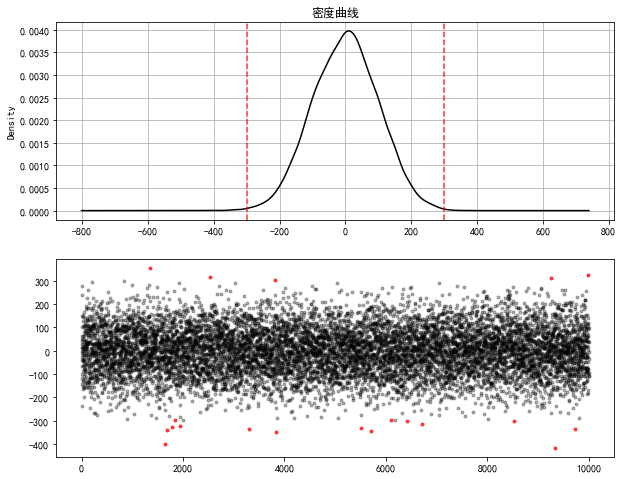

In [20]:
data = pd.Series(np.random.randn(10000)*100)
data.head()

u = data.mean()
std = data.std()
stats.kstest(data,'norm',(u,std))

fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(2,1,1)
data.plot(kind = 'kde',grid = True, style = '-k', title = '密度曲线')
plt.axvline(3*std, color = 'r', linestyle = '--', alpha = 0.8)
plt.axvline(-3*std, color = 'r', linestyle = '--', alpha = 0.8)

error = data[np.abs(data - u) > 3*std]
data_c = data[np.abs(data - u) <= 3*std]
ax2 = fig.add_subplot(2,1,2)
plt.scatter(data_c.index, data_c, color = 'k', marker = '.',alpha = 0.3)
plt.scatter(error.index, error, color = 'r', marker = '.',alpha = 0.7)

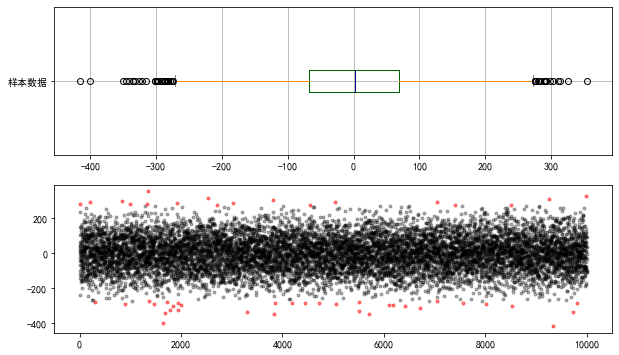

In [31]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
color = dict(boxes = 'DarkGreen', whiskers = 'DarkOrange', medians = 'DarkBlue', caps ='Gray')
data.plot.box(vert = False, grid = True, color = color , ax = ax1, label = '样本数据')

s = data.describe()
q1 = s['25%']
q3 = s['75%']
iqr = q3 - q1

mi = q1 - 1.5*iqr
ma = q3 + 1.5*iqr

ax2 = fig.add_subplot(2,1,2)
error = data[(data < mi) | (data > ma)]
data_c = data[(data >= mi) & (data <= ma)]
plt.scatter(data_c.index, data_c, color = 'k', marker = '.', alpha = 0.3)
plt.scatter(error.index, error ,color = 'r', marker = '.', alpha = 0.5)